In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests
import matplotlib.lines as mlines
import pickle



In [2]:
# define path
path = '/Users/laurituominen/Documents/Research/Reettis/neuromaps/'

# get turku data for plotting 
with open(path + 'data/neurosynth_results_turku.pkl', 'rb') as f:
    # load the dictionary from the file
    neurosynth_results_turku = pickle.load(f)

# get enigma data for plotting 
with open(path + 'data/neurosynth_results_enigma.pkl', 'rb') as f:
    # load the dictionary from the file
    neurosynth_results_enigma = pickle.load(f)

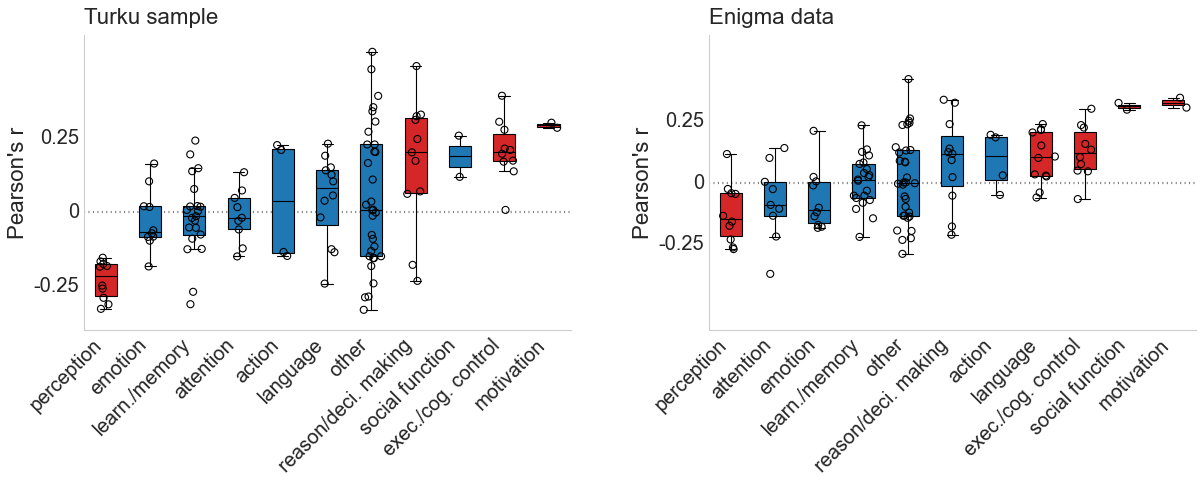

In [386]:
# define function for plotting to reduce code 
def plt_neurosynth(results, ax, title): 
    
    r_categories = results['r_categories']
    order = np.argsort(r_categories)
    r_categories_p = results['r_categories_p']
    categories = results['categories']
    categories_labels = results['categories_labels']
    categories_ordered = list(np.array(categories_labels)[order])
    ordered_p = r_categories_p[order]
    ordered_r = r_categories[order]

    rho_all = results['rho']
    r_categories_p = results['r_categories_p']
    r_all_categories = {}
    for i in order:
        r_all_categories[categories_ordered[i]] = rho_all[np.where(categories == i+1)]

    values = list(r_all_categories.values())
    labels = list(r_all_categories.keys())
    
    bp = ax.boxplot(values, 
                     labels=labels,
                     patch_artist=True,
                     showfliers = False,
                     whiskerprops=dict(color='black', linestyle='-'),            
                     medianprops=dict(color='black'),
                     boxprops = dict(linestyle='-', linewidth=1, color='black'));

    for i, data in enumerate(values, start=1):
        y = data
        x = np.random.normal(i, 0.1, size=len(data))
        ax.scatter(x, y, color='none',s=40, edgecolors='black',  linewidth=1, rasterized=True, zorder=1000)

    for i, box in enumerate(bp['boxes']):
        if ordered_p[i] < 0.05 : 
            box.set_facecolor((0.839, 0.152, 0.156))
        else:
            box.set_facecolor((0.121, 0.466, 0.705))

    ax.set_title(title, loc='left', size=20, pad=10.0)
    ax.set(yticks=[-.25, 0, .25])
    ax.set_yticklabels(['-0.25', '0', '0.25'])
    ax.set_ylabel("Pearson's r", fontsize=20)
    ax.tick_params(axis='y', labelsize=18)
    ax.set_xticklabels(categories_ordered, rotation=45, ha="right", fontsize=18);
    ax.grid(False)
    ax.axhline(y=0, color='gray', linestyle=':', zorder=-1)
    ax.set_xticks(np.arange(1, 12, 1))    


# plot 
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

fig, axes = plt.subplots(1,2, figsize=(15, 6))

plt_neurosynth(neurosynth_results_turku, axes[0], 'Turku sample')    
plt_neurosynth(neurosynth_results_enigma, axes[1], 'Enigma data')    

plt.tight_layout(pad=0.4, w_pad=4.0, h_pad=1.0)

plt.savefig(path + 'figures/test.png', bbox_inches="tight", dpi=300)


IndexError: list index out of range

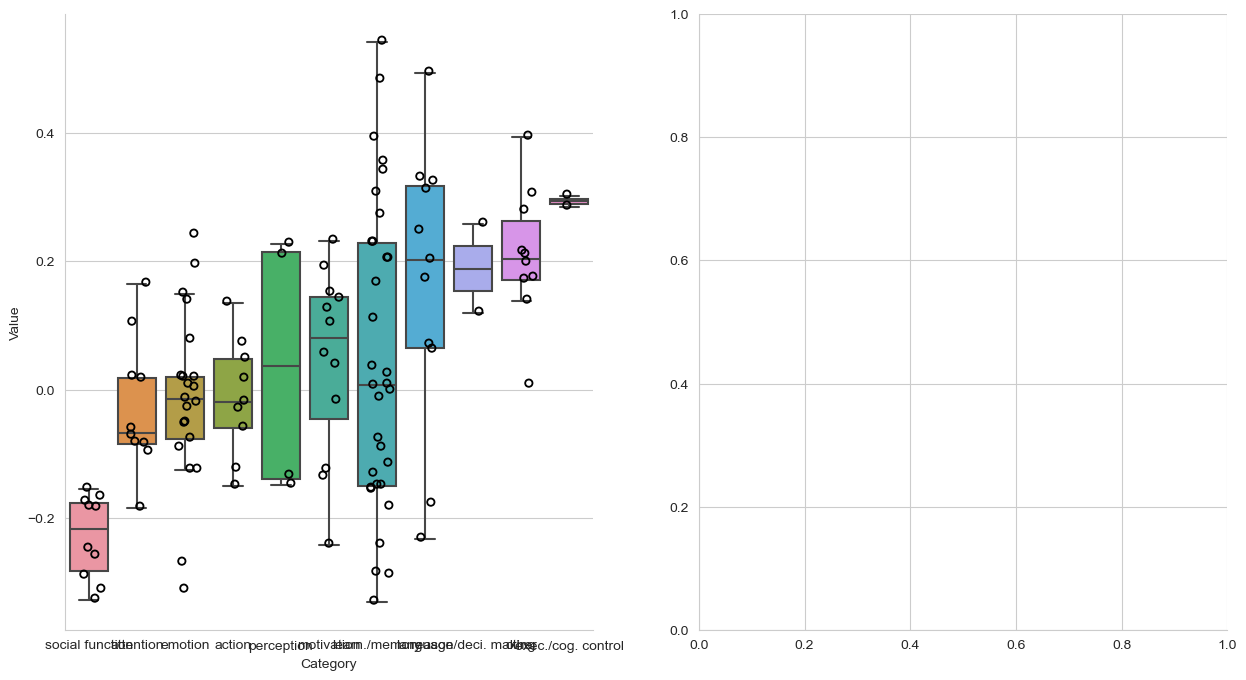

In [261]:
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

fig, axes = plt.subplots(1, 2, figsize=(15, 8))

fname = path + 'figures/neurosynth_turku_Figure_v1.jpg'
df_melt = plt_neurosynth(fig, axes[0], neurosynth_results_turku, 'Turku sample')
plt_neurosynth(fig, axes[1], neurosynth_results_enigma, 'ENIGMA data')
plt.tight_layout(pad=0.4, w_pad=6.0, h_pad=1.0)

plt.savefig(path + 'figures/test.png', bbox_inches="tight", dpi=300)



In [236]:
df_melt = df_melt.dropna()
df_melt

AttributeError: 'NoneType' object has no attribute 'dropna'

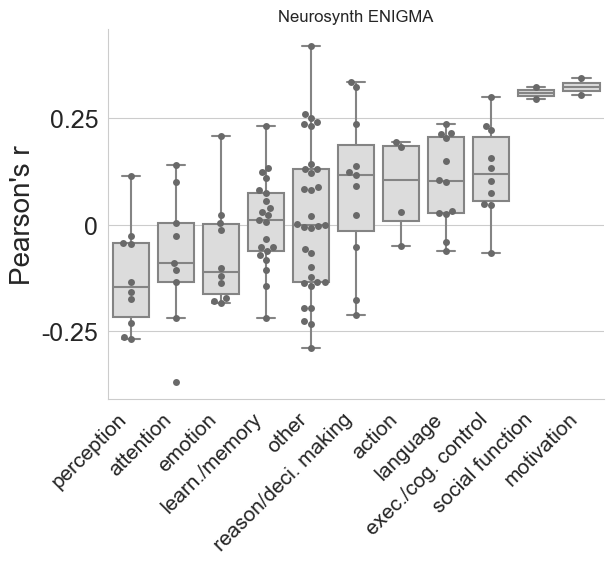

In [32]:
fname = path + 'figures/neurosynth_enigma_Figure_v1.jpg'
plt_neurosynth(neurosynth_results_enigma,'Neurosynth ENIGMA' ,fname)

In [30]:
penguins = sns.load_dataset("penguins")

colormap = {"Adelie": "purple", "Chinstrap": "orange", "Gentoo": "green"}

sns.jointplot(
    data=penguins,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species",
    palette=colormap,
    ec=penguins["species"].map(colormap),
    fc="none",
)

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:997)>

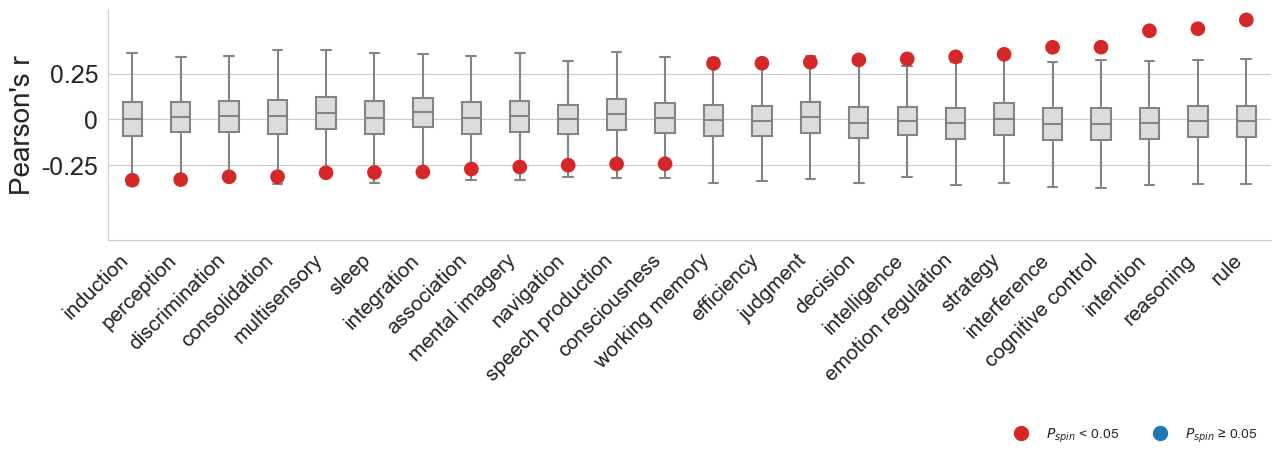

In [163]:
corrs_turku_ns = dict(np.load(path + 'data/corrs_turku_neurosynth.npz'))
nulls_turku_ns = dict(np.load(path + 'data/nulls_turku_neurosynth.npz'))

# get dataframes
df_nulls = pd.DataFrame.from_dict(nulls_turku_ns)
df_corrs = pd.DataFrame.from_dict(corrs_turku_ns, orient='index') 
df_corrs.columns = ['rho', 'pspin']

# colors based on p-values
color = ((df_corrs['pspin'] > 0.05).astype(int)).tolist()
color = [(0.839, 0.152, 0.156) if x == 0 else (0.121, 0.466, 0.705) for x in color]
x = np.arange(df_corrs.shape[0])
cpalette = dict(zip(x, color))
    
# plots 
fig = plt.figure(figsize=(15,3))
sns.set_style("whitegrid")

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

ax1 = sns.boxplot(data=df_nulls, width=0.4, fliersize=0, color ='gainsboro')
ax2 = sns.pointplot(x=x,
              y=df_corrs['rho'],
              palette=cpalette,
              join = False , 
              scale=1.2);

# fix zorder
children1 = ax1.get_children()
children2 = ax2.get_children()

# Set the zorder of the children of the boxplot to 1
for child in children1:
    child.set_zorder(10)

# Set the zorder of the children of the pointplot to 2
for child in children2:
    child.set_zorder(20)

ax1.set_axisbelow(True)

# labels and such
ax1.set(yticks=[-.25, 0, .25])
ax1.set_yticklabels(['-0.25', '0', '0.25'])
xlabel = [k.replace('_', ' ') for k in corrs_turku_ns.keys() ]
ax1.set_xticklabels(xlabel, rotation=45, ha="right", fontsize=15)
ax1.set_ylabel("Pearson's r", fontsize=20)
ax1.tick_params(axis='y', labelsize=18)

blue_circle = mlines.Line2D([], [], color=(0.839, 0.152, 0.156), marker='o', linestyle='None',
                          markersize=10, label='$P_{spin}$ < 0.05')
red_circle = mlines.Line2D([], [], color=(0.121, 0.466, 0.705), marker='o', linestyle='None',
                          markersize=10, label='$P_{spin}$ ≥ 0.05')

plt.legend(handles=[blue_circle, red_circle], frameon=False, bbox_to_anchor=(1, -0.75), ncol=2)

plt.savefig(path + 'figures/neurosynth_Figure_v2.jpg', bbox_inches="tight", dpi=300) 

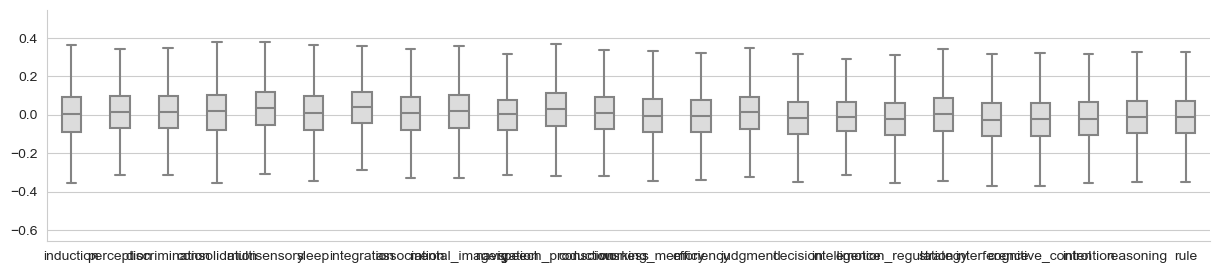

In [162]:


# get dataframes
df_nulls = pd.DataFrame.from_dict(nulls_turku_ns)
df_corrs = pd.DataFrame.from_dict(corrs_turku_ns, orient='index') 
df_corrs.columns = ['rho', 'pspin']

# colors based on p-values
color = ((df_corrs['pspin'] > 0.05).astype(int)).tolist()
color = [(0.839, 0.152, 0.156) if x == 0 else (0.121, 0.466, 0.705) for x in color]
x = np.arange(df_corrs.shape[0])
cpalette = dict(zip(x, color))
    
# plots 
fig = plt.figure(figsize=(15,3))
sns.set_style("whitegrid")

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

ax1 = sns.boxplot(data=df_nulls, width=0.4, fliersize=0, color ='gainsboro')



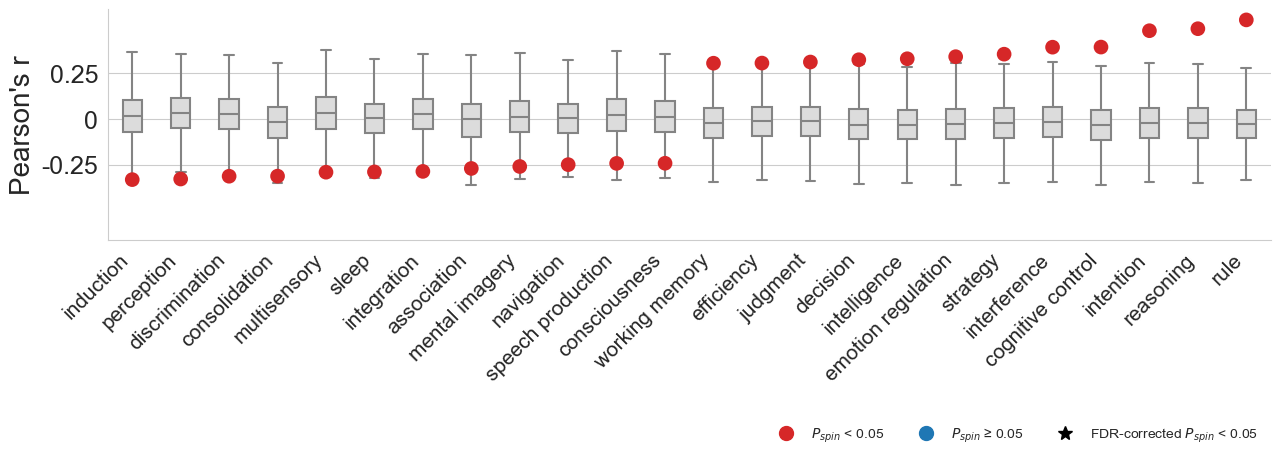

In [5]:
# get ENIGMA data 
corrs_enigma_ns = dict(np.load(path + 'data/corrs_enigma_neurosynth.npz'))
nulls_enigma_ns = dict(np.load(path + 'data/nulls_enigma_neurosynth.npz'))

# dataframes 
df_nulls = pd.DataFrame.from_dict(nulls_enigma_ns)
df_corrs = pd.DataFrame.from_dict(corrs_enigma_ns, orient='index') 
df_corrs.columns = ['rho', 'pspin']

# add the FDR corrected p-values as a new column to the dataframe
_, fdr_corrected_pvalues, _, _ = multipletests(df_corrs['pspin'], alpha=0.05, method='fdr_bh')

# add the FDR corrected p-values as a new column to the dataframe
df_corrs['fdr_corrected_p_value'] = fdr_corrected_pvalues

# colors  based on p-vals 
color = ((df_corrs['pspin'] > 0.05).astype(int)).tolist()
color = [(0.839, 0.152, 0.156) if x == 0 else (0.121, 0.466, 0.705) for x in color]
x = np.arange(df_corrs.shape[0])
cpalette = dict(zip(x, color))
    
# plot
fig = plt.figure(figsize=(15,3))
sns.set_style("whitegrid")

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

ax1 = sns.boxplot(data=df_nulls, width=0.4, fliersize=0, color ='gainsboro')
ax2 = sns.pointplot(x=x,
              y=df_corrs['rho'],
              palette=cpalette,
              join = False , 
              scale=1.2,
              ax=ax1);


# fix zorder
children1 = ax1.get_children()
children2 = ax2.get_children()

# Set the zorder of the children of the boxplot to 1
for child in children1:
    child.set_zorder(10)

# Set the zorder of the children of the pointplot to 2
for child in children2:
    child.set_zorder(20)

ax1.set_axisbelow(True)

ax1.set(yticks=[-.25, 0, .25])

ax1.set_yticklabels(['-0.25', '0', '0.25'])
xlabel = [k.replace('_', ' ') for k in corrs_enigma_ns.keys() ]
ax1.set_xticklabels(xlabel, rotation=45, ha="right", fontsize=15)
ax1.set_ylabel("Pearson's r", fontsize=20)
ax1.tick_params(axis='y', labelsize=18)

blue_circle = mlines.Line2D([], [], color=(0.839, 0.152, 0.156), marker='o', linestyle='None',
                          markersize=10, label='$P_{spin}$ < 0.05')
red_circle = mlines.Line2D([], [], color=(0.121, 0.466, 0.705), marker='o', linestyle='None',
                          markersize=10, label='$P_{spin}$ ≥ 0.05' )
black_star = mlines.Line2D([], [], color='black', marker='*', linestyle='None',
                          markersize=10, label='FDR-corrected $P_{spin}$ < 0.05' )

plt.legend(handles=[blue_circle, red_circle, black_star], frameon=False, bbox_to_anchor=(1, -0.75), ncol=3)

#plt.savefig(path + 'figures/Figure4.jpg', bbox_inches="tight", dpi=300) 